# Project: Investigate a Dataset - [TMVB Movie]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.



### Question(s) for Analysis
1- Which genres are most popular from year to year?

2- What properties are associated with highly rated movies?

3- Does popular movies have alot of votes?

4- Long or short movies are more popular?

5- What is the count of movies released per year?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [2]:
### reading data we're going to work on
df = pd.read_csv('tmdb-movies.csv',)
df.shape

(10866, 21)

In [3]:
### displaying fisrt 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
### looking at data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning


In [5]:
### data we wonn't be using
df = df.drop(['imdb_id', 'homepage', 'tagline','keywords', 'overview', 'production_companies', 'budget_adj','revenue_adj'], axis=1)

Looking for the number of missing values in each column:

In [6]:
### looking for missing values
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [7]:
### now we drop NANs:
df.dropna(inplace=True)

In [8]:
### dropping the duplicates:
df.drop_duplicates(inplace=True)

In [9]:
sns.set()

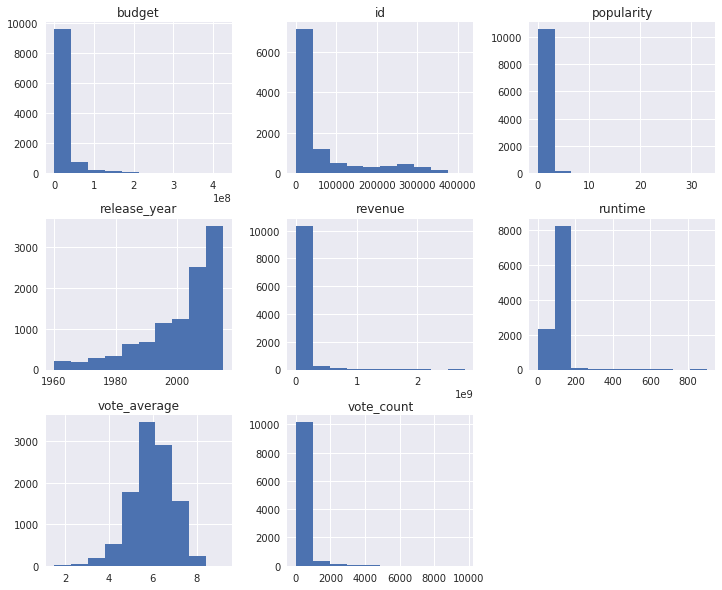

In [10]:
### visualizing data:
df.hist(figsize=(12,10));

changing 'runtime' column from float to integer:

In [11]:
df.astype({"runtime": "int"})

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015


Separating the data in genres column:

In [12]:
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action,4/1/15,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which genres are most popular from year to year!)

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
populargenre = df.groupby(['genres'])['popularity'].mean()
populargenre

genres
Action             0.837782
Adventure          1.219834
Animation          0.853208
Comedy             0.538260
Crime              0.694063
Documentary        0.184773
Drama              0.554173
Family             0.739779
Fantasy            0.868512
Foreign            0.178917
History            0.764636
Horror             0.468638
Music              0.462125
Mystery            0.596896
Romance            0.707231
Science Fiction    1.087261
TV Movie           0.245873
Thriller           0.673381
War                0.777887
Western            0.690646
Name: popularity, dtype: float64

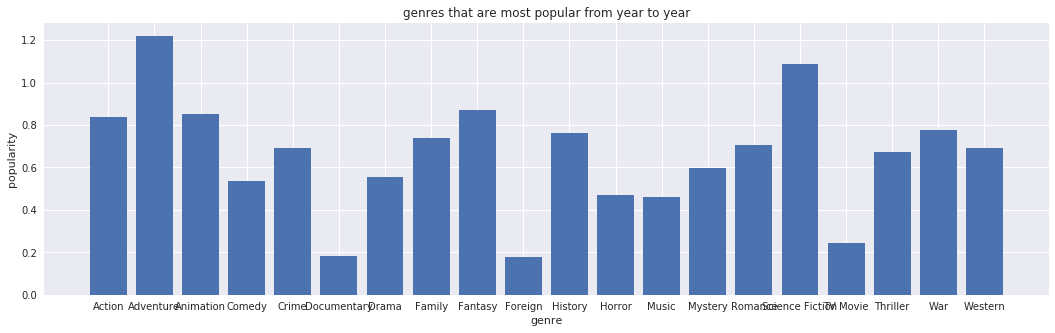

In [14]:
plt.subplots(figsize=(18, 5))
plt.bar(populargenre.index, populargenre)
plt.title('genres that are most popular from year to year')
plt.xlabel('genre')
plt.ylabel('popularity');

Most popular genre is 'Adventure'.

### Research Question 2  (What properties are associated with highly rated movies?)

In [15]:
def highrated(df, column1, column2,title, xlabel, ylabel):
    df.plot(title=title, x=column1, y=column2, kind='scatter');

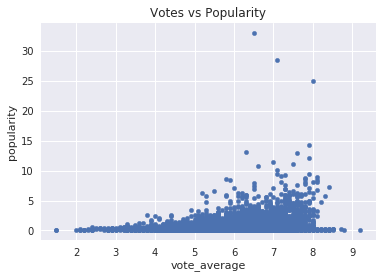

In [16]:
highrated(df, "vote_average", "popularity","Votes vs Popularity", "Votes", "Popularity")

highly rated movies obviously have big wide popularity

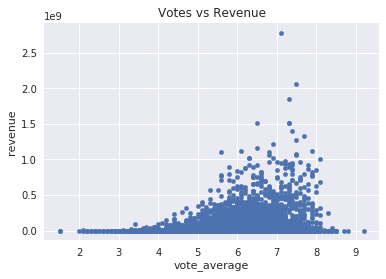

In [17]:
#what does revenue have to do with vote average
highrated(df, "vote_average", "revenue","Votes vs Revenue", "Votes", "Revenue")

Movies with big revenues are highly rated.

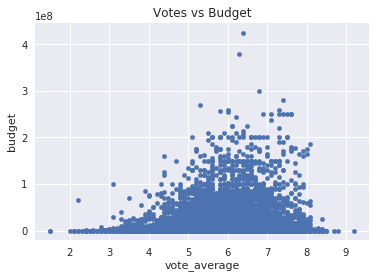

In [18]:
#what does budget have to do with vote average
highrated(df, "vote_average", "budget","Votes vs Budget", "Votes", "Budget")

Same as revenues, movies with large budget are more to be highly rated

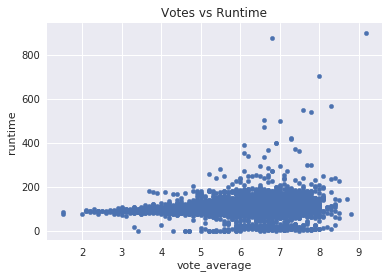

In [19]:
#what does runtime have to do with vote average
highrated(df, "vote_average", "runtime","Votes vs Runtime", "Votes", "Runtime")

Seems that the longest movies have are more highly rated

### Research question 3 (Does popular movies have alot of votes?)

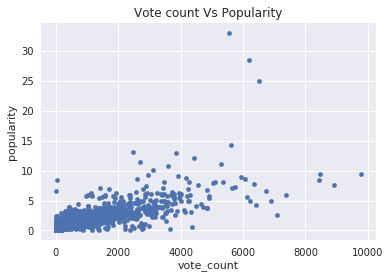

In [20]:
df.plot(title='Vote count Vs Popularity', x='vote_count', y='popularity', kind='scatter');

Most of movies are not that popular but they still have lots of votes.

### Research question 4 (Long or short movies are more popular?)

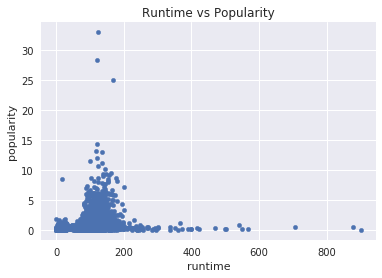

In [21]:
df.plot(title='Runtime vs Popularity', x='runtime', y='popularity', kind='scatter');

Short movies are more popular than long ones.

### Research question 5 (Count of movies released per year.)

In [22]:
moviescount = df.groupby(['release_year'])['original_title'].count()
moviescount

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     38
1968     38
1969     30
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     56
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    104
1985    108
1986    120
1987    124
1988    142
1989    135
1990    132
1991    133
1992    132
1993    177
1994    184
1995    174
1996    203
1997    191
1998    210
1999    224
2000    224
2001    241
2002    264
2003    281
2004    307
2005    361
2006    404
2007    432
2008    486
2009    525
2010    475
2011    532
2012    574
2013    649
2014    682
2015    617
Name: original_title, dtype: int64

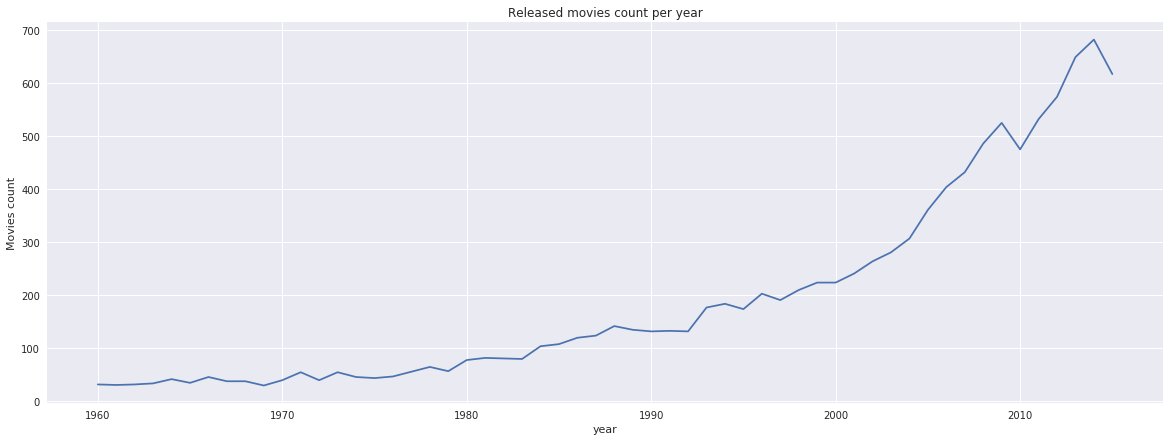

In [23]:
plt.subplots(figsize=(20, 7))
plt.title('Released movies count per year')
plt.xlabel('year')
plt.ylabel('Movies count')
plt.plot(moviescount);

Movies industry has obviously increased over years.

<a id='conclusions'></a>
## Conclusions
I concluded in the first question that the most popular genre from year to year is "Adventure"
Seconed question i looked for each property that could relate to high rated movies and as shown above, highly rated movies are so popular, they also have big budgets and revenues and most of them are long.

Short movies are more popular than long ones.

In reasearch question 5, we can see that over the years, the count of movies released is increasing.

## Limitations:

1- would have been better if there was data about each actor popularity to see if they were the reason of movie's popuarity.

2- would have been better if there was gender data for votes so we could know if the movie is popular between men or women.

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0